## Libraries and Dataset

In [156]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [157]:
# load the dataset

df = pd.read_csv('/content/Multiclass Diabetes Dataset.csv')

## EDA

In [158]:
# first five rows of the dataset

df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [159]:
# shape of the dataset

df.shape

(264, 12)

In [160]:
# data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [161]:
# statistics

df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


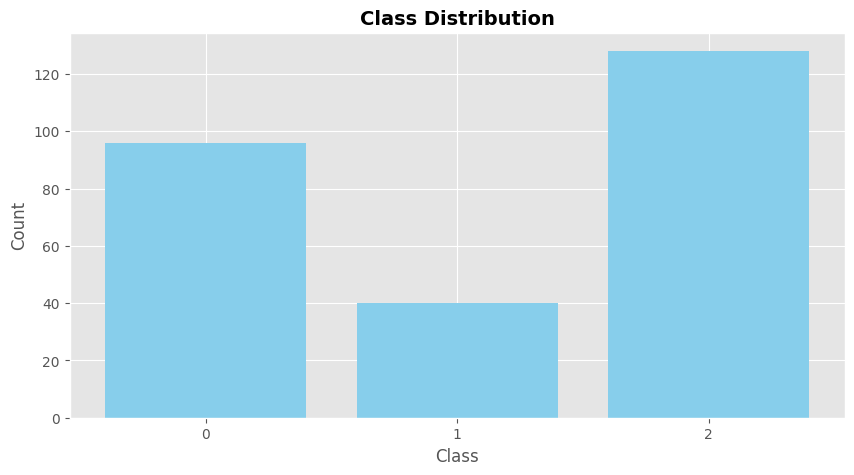

In [162]:
# class distribution

class_counts = df['Class'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.xticks([0, 1, 2])
plt.ylabel('Count', fontsize=12)
plt.show()

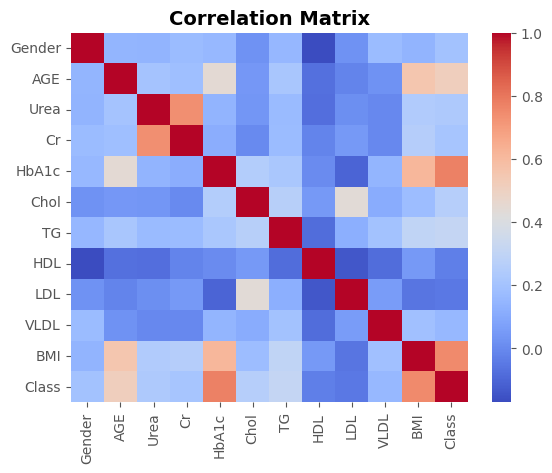

In [163]:
# correlations

sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

## Preprocessing

In [164]:
# separate features and class columns

X = df.drop('Class', axis=1)
y = df['Class']

In [165]:
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [166]:
# scale features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# oversampling to deal with class imbalance

smote = SMOTE(sampling_strategy={1: 96})
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

## Training Model and Evaluation

In [168]:
# initialize models

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}

In [169]:
# fit and predict

accuracy_scores = dict()

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

    print(f'\n##### {name} #####')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classfication Report:\n{classification_report(y_test, y_pred)}')


##### LogisticRegression #####
Confusion Matrix:
[[17  1  1]
 [ 1  5  2]
 [ 0  1 25]]
Classfication Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.71      0.62      0.67         8
           2       0.89      0.96      0.93        26

    accuracy                           0.89        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.88      0.89      0.88        53


##### RandomForestClassifier #####
Confusion Matrix:
[[19  0  0]
 [ 0  8  0]
 [ 0  1 25]]
Classfication Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      1.00      0.94         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.96      0.99      0.97        53
weighted avg       0.98      0.98      0.98        53


##### XGBClassi

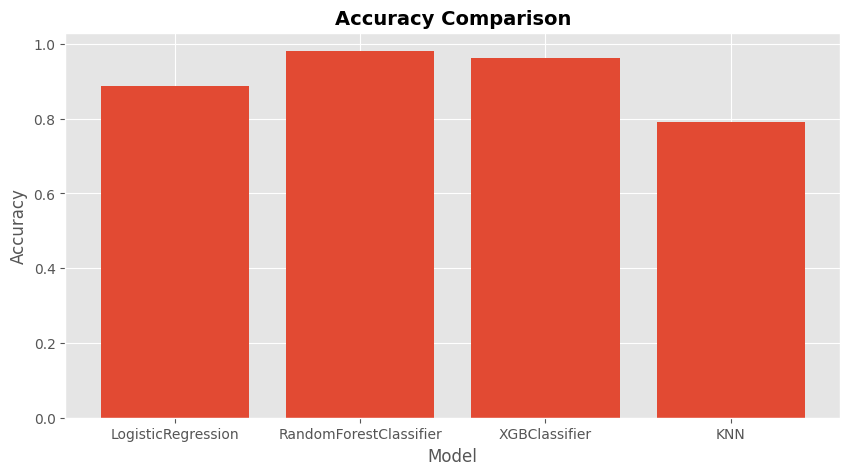

In [170]:
# results

plt.figure(figsize=(10, 5))
plt.bar(list(accuracy_scores.keys()), list(accuracy_scores.values()))
plt.title('Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()